In [1]:
import numpy as np

import importlib
import os, sys
sys.path.append(os.path.abspath(".."))

In [2]:
# --------------------------
# Module reload utility cell
# --------------------------
import importlib
import models.heston
import models.doubleheston
import plotting.plot_utils
import utils.hedging

# Reload modules to pick up edits
importlib.reload(models.heston)
importlib.reload(models.doubleheston)
importlib.reload(plotting.plot_utils)
importlib.reload(utils.hedging)

<module 'utils.hedging' from '/home/machine/Desktop/ErdosFinance2025/utils/hedging.py'>

## Comparison with class hedging

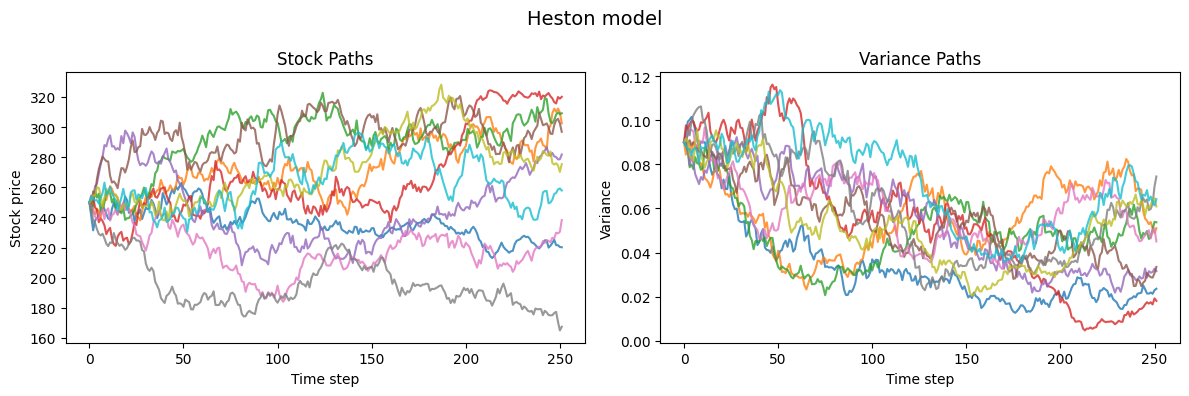

In [3]:
Heston_q_test=models.heston.Heston(r=0.039, q=0.0, 
                                 kappa=2.0, 
                                 theta=0.23**2, 
                                 sigma=0.2, 
                                 rho=-0.6)

S_hq_test, V_hq_test = Heston_q_test.simulate_paths(mu=Heston_q_test.r,T=1, S0=250, v0=0.09,
                                                    N_paths=10,N_steps=252, 
                                                    seed=20)

plotting.plot_utils.plot_paths(S_hq_test,V_hq_test, title='Heston model')

In [4]:
hedging_hq_test=utils.hedging.delta_hedge(mu=0.439,model=Heston_q_test, 
                                      K=250,T=1, S0=250, v0=0.09,
                                     N_paths=10000, N_steps=252, seed=20)

laguerre quadrature rule with parameters: nodes=32
-0.019401165791601532 3.1286536866054417


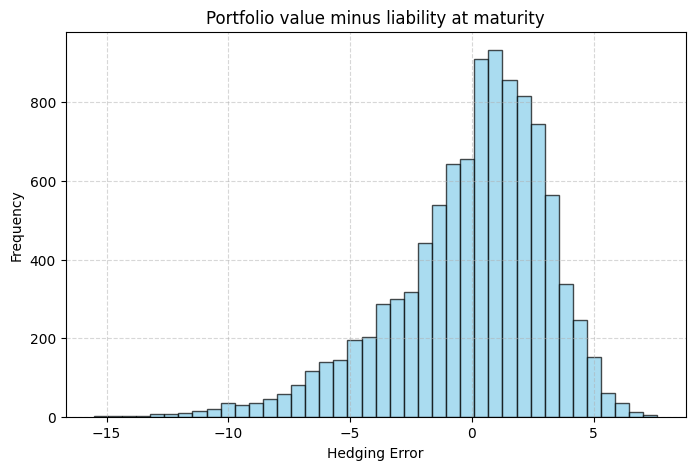

In [5]:
import matplotlib.pyplot as plt

# hedging_error_T is an array of shape (N_paths,)
plt.figure(figsize=(8,5))
plt.hist(hedging_hq_test["Portfolio"][:,-1]-hedging_hq_test["liability_T"], bins=40, color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Portfolio value minus liability at maturity")
plt.xlabel("Hedging Error")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Mean call_profits_hedged: 30.51970225956986
Std call_profits_hedged: 3.0089849017664814


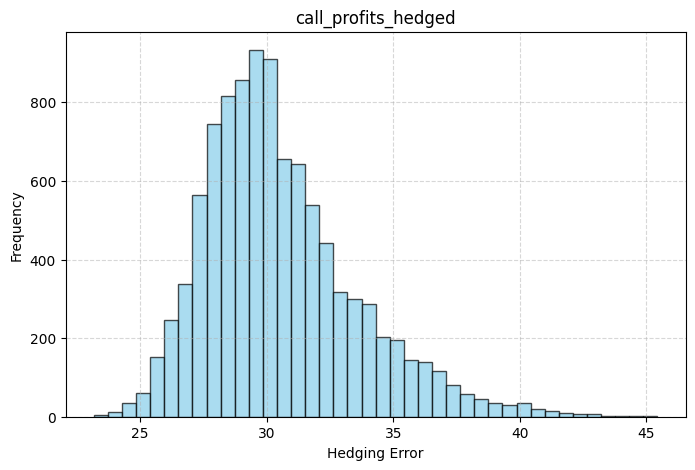

In [6]:
# assume you have these from your delta_hedge output
Delta = hedging_hq_test["Delta"]          # shape (N_paths, N_steps)
S     = hedging_hq_test["S"]              # shape (N_paths, N_steps)
r     = Heston_q_test.r                            # risk-free rate
K     = 250                        # strike used in hedging
T     = 1                    # total time
N_paths, N_steps = S.shape

# times corresponding to each step
times = np.linspace(0, T, N_steps)
dt = T / (N_steps - 1)

# incremental stock profits
delta_S = S[:,1:] - S[:,:-1] * np.exp(r*dt)

# discounted stock profits
# multiply by Delta at the beginning of each interval
# and discount back to t=0
stock_profits_discounted = delta_S * Delta[:,:-1] * np.exp(-r*times[1:, np.newaxis].T)

# total discounted stock profits per path
total_stock_profits = np.sum(stock_profits_discounted, axis=1)

# discounted option payoff at t=0
call_payout_discounted = np.maximum(S[:,-1] - K, 0) * np.exp(-r*T)

# hedging P&L according to professor's convention
call_profits_hedged = call_payout_discounted - total_stock_profits

# optional: print summary statistics
print("Mean call_profits_hedged:", np.mean(call_profits_hedged))
print("Std call_profits_hedged:", np.std(call_profits_hedged))

# hedging_error_T is an array of shape (N_paths,)
plt.figure(figsize=(8,5))
plt.hist(call_profits_hedged, bins=40, color='skyblue', edgecolor='k', alpha=0.7)
plt.title("call_profits_hedged")
plt.xlabel("Hedging Error")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [7]:
hedging_hq_test["Price_call"][:,0]

array([30.50104317, 30.50104317, 30.50104317, ..., 30.50104317,
       30.50104317, 30.50104317], shape=(10000,))

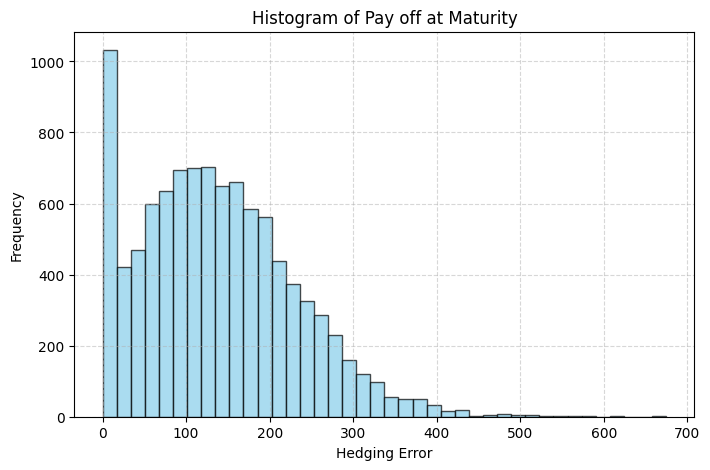

In [8]:
import matplotlib.pyplot as plt

# hedging_error_T is an array of shape (N_paths,)
plt.figure(figsize=(8,5))
liability=hedging_hq_test["liability_T"]
plt.hist(liability*np.exp(-Heston_q_test.r), bins=40, color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Histogram of Pay off at Maturity")
plt.xlabel("Hedging Error")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

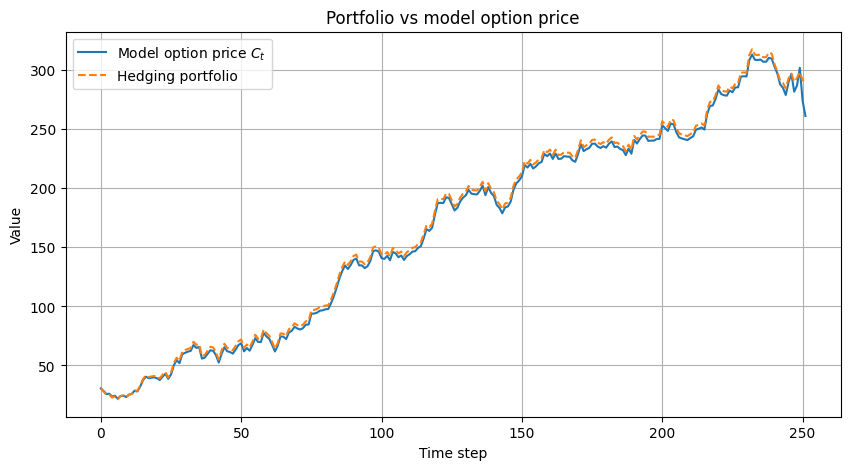

In [9]:
utils.hedging.hedge_plot(hedging_hq_test["Price_call"][0], hedging_hq_test["Portfolio"][0])

In [10]:
hedging_hq_test["Portfolio"][0], hedging_hq_test["Cash"][0]

(array([ 30.50104317,  27.96978708,  24.99204623,  25.26657269,
         22.81286044,  23.69121014,  21.37870201,  23.98881252,
         24.58441213,  23.23949662,  25.26466574,  25.9086974 ,
         28.84005213,  28.56601294,  32.89277344,  38.41202874,
         41.34121441,  40.13174352,  40.67032914,  41.08003475,
         40.78747619,  39.00611447,  42.26382029,  44.58172836,
         39.73340793,  44.05853834,  51.99999218,  56.47240829,
         53.95212543,  61.70219687,  63.01530381,  64.02071404,
         64.65891028,  70.03336853,  67.47280202,  68.09623675,
         57.95552955,  58.86844358,  62.26098321,  65.77515305,
         65.23147867,  61.32428608,  54.86784077,  62.60730712,
         68.3357662 ,  64.88793101,  64.38491147,  62.86195945,
         66.51004401,  70.5022799 ,  71.96314055,  64.93878513,
         67.70001271,  65.30313634,  70.10349773,  75.96838604,
         72.58261045,  72.60586453,  80.48193491,  77.37362563,
         75.13088922,  70.02124651,  64.

In [11]:
hedging_hq_test["Price_call"][0], hedging_hq_test["Delta"][0]

(array([ 30.50104317,  28.30606163,  25.74760041,  26.04994741,
         23.70678906,  24.37505103,  21.77376123,  24.12230594,
         24.35771606,  23.23897163,  25.22430247,  25.84531707,
         28.59560234,  27.93402645,  31.99387249,  37.41213109,
         40.49037021,  39.23590576,  39.59412861,  39.88407929,
         39.14804681,  37.65694782,  40.58694626,  42.88806952,
         38.64980545,  42.32375118,  50.13169553,  54.46291295,
         51.94354714,  59.46997003,  60.70675253,  61.67449795,
         62.31082354,  67.29705037,  64.8258689 ,  65.68750628,
         55.79498567,  56.5281412 ,  59.7975678 ,  62.84036845,
         62.34712952,  58.70248163,  52.43465663,  59.7503285 ,
         65.45044515,  61.97989243,  61.3737259 ,  59.99406314,
         63.36865218,  67.26554311,  68.78594769,  61.96031273,
         64.7345753 ,  62.48380625,  67.37392891,  73.12133239,
         69.9043541 ,  69.82873064,  77.56425389,  74.49830077,
         72.4723371 ,  67.51283623,  61.